In [2]:
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset and split test & training data

In [5]:
kaggle = pd.read_csv('datasets/chosen_imdb_kaggle.csv', escapechar='\\')
kaggle_as_numpy = kaggle.drop(columns=['Unnamed: 0', 'tid', 'title']).values
headers = list(kaggle.drop(columns=['imdbRating', 'Unnamed: 0', 'tid', 'title']).columns.values)
y = kaggle_as_numpy[:,0]
x = kaggle_as_numpy[:,1:]
test_number = 59
n_fold = 10 # For cross-validation
samples_per_fold = 60 # For cross-validation
y_test = y[:test_number]
y_train = y[test_number:]
x_test = x[:test_number]
x_train = x[test_number:]

In [7]:
np.max(y), np.min(y)

(9.3, 4.3)

In [3]:
kaggle

,Unnamed: 0,tid,title,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,0,tt0033467,Citizen Kane (1941),8.5,228617.0,7140.0,1941.0,0,7,10,...,0,0,0,0,0,0,0,0,0,0
1,1,tt0036775,Frau ohne Gewissen (1944),8.5,71266.0,6420.0,1944.0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,2,tt0038650,It's a Wonderful Life (1946),8.7,197764.0,7800.0,1946.0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
3,3,tt0042192,Alles über Eva (1950),8.4,61738.0,8280.0,1950.0,0,15,15,...,0,0,0,0,0,0,0,0,0,0
4,4,tt0043014,Boulevard der Dämmerung (1950),8.6,102072.0,6600.0,1950.0,0,17,13,...,0,0,0,0,0,0,0,0,0,0
5,5,tt0044079,Der Fremde im Zug (1951),8.1,69387.0,5520.0,1951.0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
6,6,tt0047396,Das Fenster zum Hof (1954),8.6,229323.0,6720.0,1954.0,0,6,6,...,0,0,0,0,0,0,0,1,0,0
7,7,tt0053604,Das Appartement (1960),8.4,77601.0,7500.0,1960.0,0,18,8,...,0,0,1,0,0,0,0,0,0,0
8,8,tt0054215,Psycho (1960),8.6,296676.0,6540.0,1960.0,0,6,5,...,0,0,0,0,0,0,0,1,0,0
9,9,tt0058946,Schlacht um Algier (1966),8.2,25876.0,7260.0,1966.0,0,9,3,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaling = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(x_train)
svr_x_test = scaling.transform(x_test)
svr_x_train = scaling.transform(x_train)

In [5]:
mse = lambda prediction, y_test:np.mean(np.square(prediction - y_test))

In [6]:
# Shape check
y_test.shape, x_test.shape, y_train.shape, x_train.shape

((59,), (59, 38), (600,), (600, 38))

# Lasso regression on IMDB

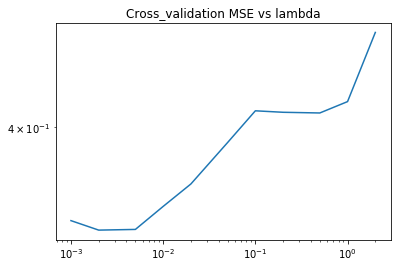

0.002

In [7]:
# Cross validation for lasso
alphas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]
mse_cross_validation_accuracy = []
for alpha in alphas:
    accurs = []
    for i in range(n_fold):
        test_index = range(i*samples_per_fold, (i+1)*samples_per_fold)
        train_index = range(i*samples_per_fold) + range((i+1)*samples_per_fold, n_fold*samples_per_fold)
        this_x_test = x_train[test_index]
        this_y_test = y_train[test_index]
        lasso_clf = linear_model.Lasso(alpha=alpha)
        lasso_clf.fit(x_train[train_index], y_train[train_index])
        this_pred = lasso_clf.predict(x_train[test_index])
        accurs.append(mse(this_pred, y_train[test_index]))
    mse_cross_validation_accuracy.append(np.mean(accurs))
plt.loglog(alphas, mse_cross_validation_accuracy)
plt.title("Cross_validation MSE vs lambda")
plt.show()
min_alpha = alphas[np.argmin(mse_cross_validation_accuracy)]
min_alpha

In [8]:
lasso_clf = linear_model.Lasso(alpha=0.002)
lasso_clf.fit(x_train, y_train)
prediction = lasso_clf.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

0.38283113165907817

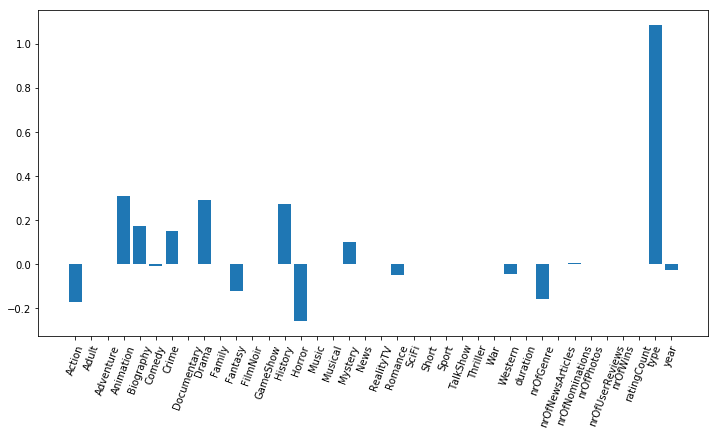

In [9]:
plt.figure(figsize=(12,6))
plt.bar(headers, lasso_clf.coef_)
plt.tick_params(axis='x', rotation=70)
plt.show()

# Ridge regression on Graph properties

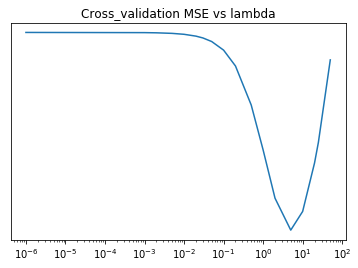

5

In [11]:
# Cross validation for ridge
alphas = [0.000001, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 25, 50]
mse_cross_validation_accuracy = []
for alpha in alphas:
    accurs = []
    for i in range(n_fold):
        test_index = range(i*samples_per_fold, (i+1)*samples_per_fold)
        train_index = range(i*samples_per_fold) + range((i+1)*samples_per_fold, n_fold*samples_per_fold)
        this_x_test = x_train[test_index]
        this_y_test = y_train[test_index]
        ridge_clf = linear_model.Ridge(alpha=alpha)
        ridge_clf.fit(x_train[train_index], y_train[train_index])
        this_pred = ridge_clf.predict(x_train[test_index])
        accurs.append(mse(this_pred, y_train[test_index]))
    mse_cross_validation_accuracy.append(np.mean(accurs))
plt.loglog(alphas, mse_cross_validation_accuracy)
plt.title("Cross_validation MSE vs lambda")
plt.show()
min_alpha = alphas[np.argmin(mse_cross_validation_accuracy)]
min_alpha

In [12]:
mse_cross_validation_accuracy

[0.35554332012235645,
 0.3555326703693268,
 0.35552202220560736,
 0.3554901510387561,
 0.35543727565933236,
 0.35533242825147165,
 0.3552287693367297,
 0.35502494228106374,
 0.3545349092685751,
 0.35363172339786536,
 0.35142227451481584,
 0.3488964006158638,
 0.34620010606341833,
 0.3444297656873562,
 0.34546411085172857,
 0.34816906402780395,
 0.34931802343686397,
 0.35397983349194384]

In [13]:
ridge_clf = linear_model.Lasso(alpha=5)
ridge_clf.fit(x_train, y_train)
prediction = ridge_clf.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

0.7453954865980865

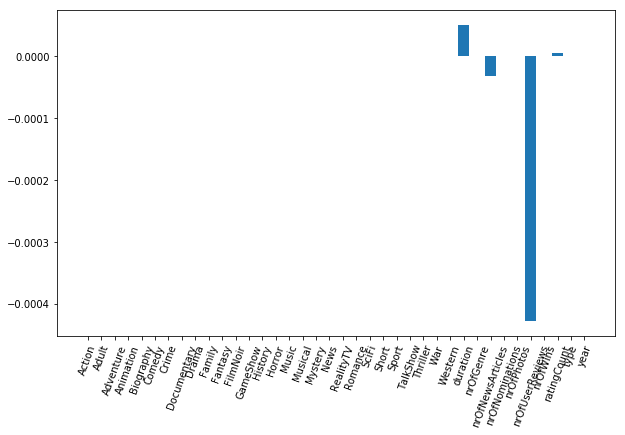

In [14]:
plt.figure(figsize=(10,6))
plt.bar(headers, ridge_clf.coef_)
plt.tick_params(axis='x', rotation=70)
plt.show()

# SVR on Graph properties

In [22]:
svr = SVR(kernel='linear', C=0.1, epsilon = 0.00001)
svr.fit(svr_x_train, y_train)
prediction = svr.predict(svr_x_test)
mse_error = mse(prediction,y_test)
mse_error

0.23230523960152527

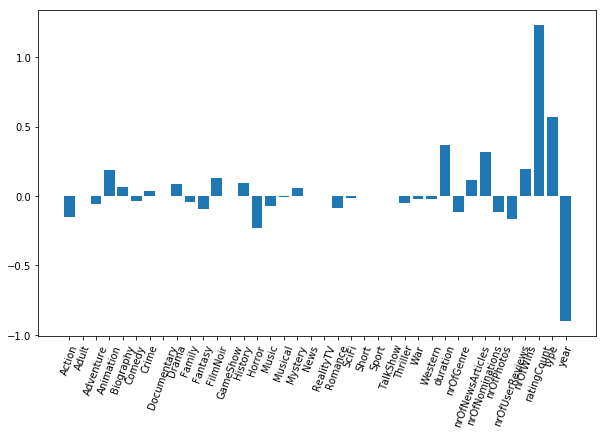

In [23]:
plt.figure(figsize=(10,6))
plt.bar(headers, svr.coef_[0])
plt.tick_params(axis='x', rotation=70)
plt.show()